In [1]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from scipy.stats import norm, spearmanr,pearsonr,normaltest
from scipy.stats import shapiro

In [2]:
# Load MATLAB data
data = scipy.io.loadmat('Data_example5.mat')
TMTa = data['TMTa']
MMSE = data['MMSE']

(array([2., 1., 1., 2., 2., 3., 0., 2., 1., 8.]),
 array([20., 21., 22., 23., 24., 25., 26., 27., 28., 29., 30.]),
 <BarContainer object of 10 artists>)

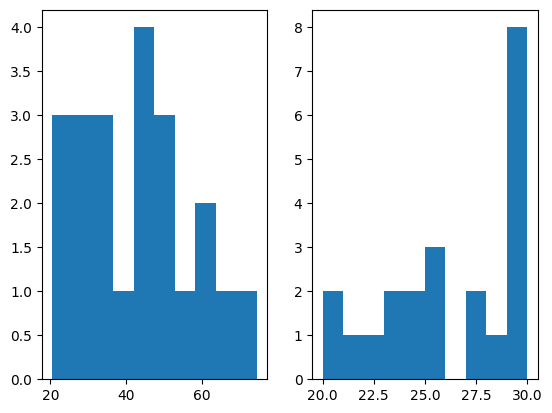

In [3]:
# Visualizzazione preliminare dei dati
plt.subplot(1, 2, 1)
plt.hist(TMTa)
plt.subplot(1, 2, 2)
plt.hist(MMSE)

In [4]:
# Test di normalità
_, p1 = normaltest(TMTa)
_, p2 = normaltest(MMSE)

In [5]:
p1

array([0.61183538])

In [6]:
p2

array([0.09415505])

Text(0, 0.5, 'TMTa [s]')

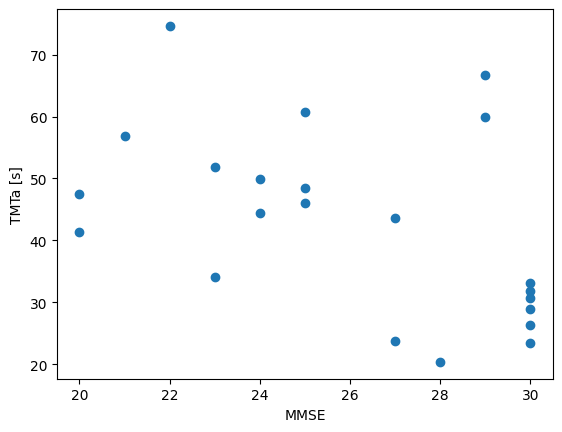

In [7]:
# Rappresentazione dei dati: scatter plot
plt.figure()
plt.scatter(MMSE, TMTa)
plt.xlabel('MMSE')
plt.ylabel('TMTa [s]')


In [8]:
# Assicurati che TMTa e MMSE siano vettori unidimensionali
TMTa = np.reshape(TMTa, -1)
MMSE = np.reshape(MMSE, -1)

In [9]:
# Correlazione
rho, pval = pearsonr(MMSE, TMTa)

In [10]:
rho

-0.47712315542168654

In [11]:
pval

0.024746636779984163

In [12]:
# Trovare i coefficienti della retta di regressione tra MMSE e TMTa
N = 1  # retta
p = np.polyfit(MMSE, TMTa, N)
# Predire i valori di TMTa, tramite p
TMTa_stimato = np.polyval(p, MMSE)

Text(0, 0.5, 'TMTa [s]')

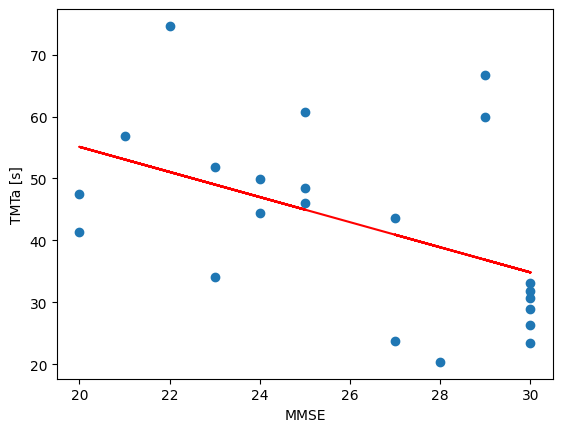

In [13]:
# Rappresentare la retta di regressione
plt.figure()
plt.scatter(MMSE, TMTa)
plt.plot(MMSE, TMTa_stimato, 'r')
plt.xlabel('MMSE')
plt.ylabel('TMTa [s]')

In [14]:
# Calcolare il coefficiente di determinazione
Rsq2 = np.sum((TMTa_stimato - np.mean(TMTa))**2) / np.sum((TMTa - np.mean(TMTa))**2)

In [15]:
Rsq2

0.22764650543954676